In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Matplotlib is building the font cache; this may take a moment.


In [12]:
data = pd.read_csv("diabetic_data - diabetic_data.csv")
print(data.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [13]:
data.shape


(101766, 50)

In [14]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [18]:
data.dropna(inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 162 to 101088
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              298 non-null    int64 
 1   patient_nbr               298 non-null    int64 
 2   race                      298 non-null    object
 3   gender                    298 non-null    object
 4   age                       298 non-null    object
 5   weight                    298 non-null    object
 6   admission_type_id         298 non-null    int64 
 7   discharge_disposition_id  298 non-null    int64 
 8   admission_source_id       298 non-null    int64 
 9   time_in_hospital          298 non-null    int64 
 10  payer_code                298 non-null    object
 11  medical_specialty         298 non-null    object
 12  num_lab_procedures        298 non-null    int64 
 13  num_procedures            298 non-null    int64 
 14  num_medications           

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop("readmitted", axis=1)
y = data["readmitted"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
train_data = X_train.join(y_train.rename("target"))
train_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,target
823,6479016,20676798,Caucasian,Male,[80-90),?,6,1,7,7,...,No,No,No,No,No,No,No,No,Yes,>30
65124,181439346,107638839,Hispanic,Female,[60-70),?,6,1,7,10,...,No,Down,No,No,No,No,No,Ch,Yes,>30
57409,163736112,106451928,AfricanAmerican,Female,[70-80),?,6,1,7,4,...,No,No,No,No,No,No,No,No,No,NO
44285,136549326,78119676,Hispanic,Female,[80-90),?,6,2,7,6,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
9118,40182816,48102489,AfricanAmerican,Male,[40-50),?,6,1,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67101,188032278,84428613,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,No,No,No,No,No,No,No,No,>30
27668,90664470,84363201,Caucasian,Female,[70-80),?,6,1,7,4,...,No,No,No,No,No,No,No,No,No,>30
35442,109829448,103685832,AfricanAmerican,Female,[60-70),?,6,3,7,7,...,No,Up,No,No,No,No,No,Ch,Yes,<30
88478,284348514,92734155,Caucasian,Male,[50-60),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,NO


array([[<Axes: title={'center': 'encounter_id'}>,
        <Axes: title={'center': 'patient_nbr'}>,
        <Axes: title={'center': 'admission_type_id'}>,
        <Axes: title={'center': 'discharge_disposition_id'}>],
       [<Axes: title={'center': 'admission_source_id'}>,
        <Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_inpatient'}>],
       [<Axes: title={'center': 'number_diagnoses'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

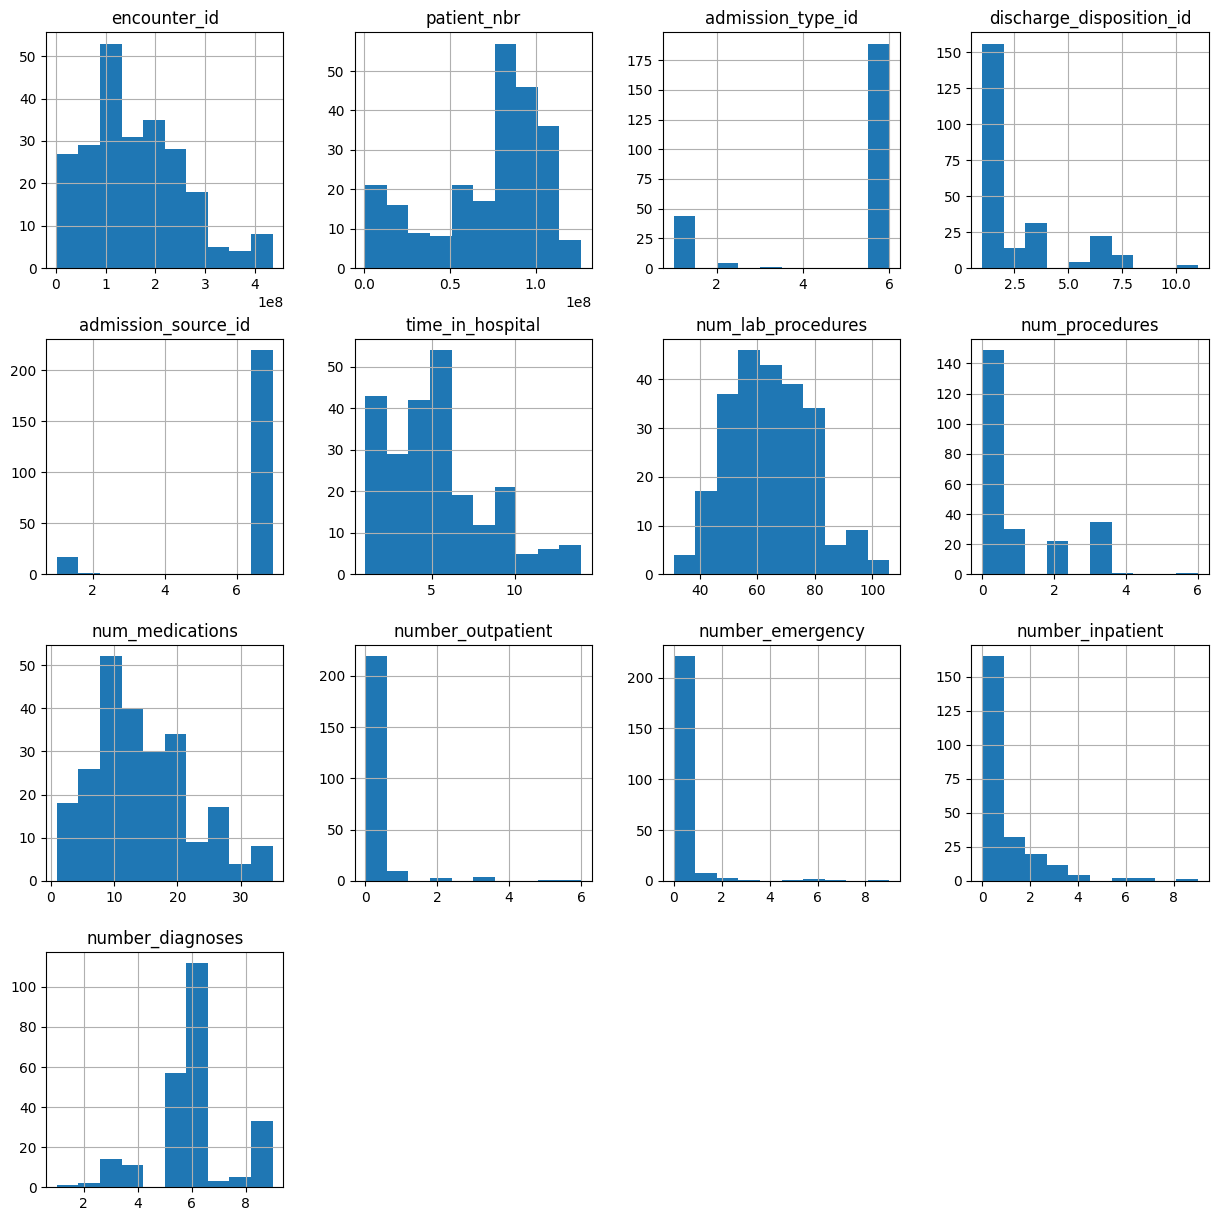

In [33]:
train_data.hist(figsize=(15, 15))

<Axes: >

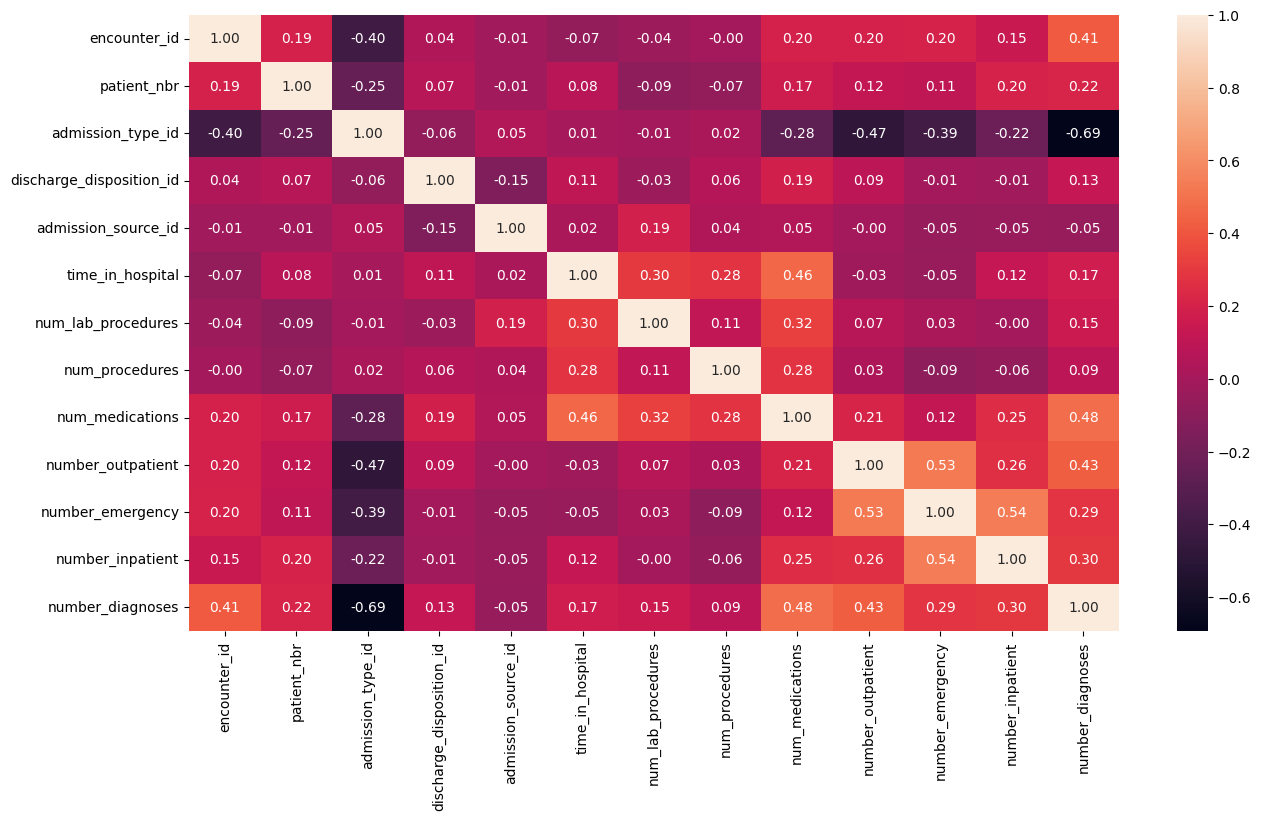

In [39]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, fmt=".2f")


The correlation matrix shows that medication count, number of lab procedures, and hospital stay duration are moderately related, reflecting that patients with longer or more intensive hospitalizations typically undergo more tests and receive more medications. There are no extremely strong correlations, suggesting limited multicollinearity among numeric variables. The admission type’s negative correlation with number of diagnoses may reflect differences between emergency and scheduled admissions.

In [44]:
train_data['time_in_hospital'] = np.log(train_data['time_in_hospital'] + 1)
train_data['num_lab_procedures'] = np.log(train_data['num_lab_procedures'] + 1)
train_data['num_procedures'] = np.log(train_data['num_procedures'] + 1)
train_data['number_emergency'] = np.log(train_data['number_emergency'] + 1)
train_data['number_diagnoses'] = np.log(train_data['number_diagnoses'] + 1)


array([[<Axes: title={'center': 'encounter_id'}>,
        <Axes: title={'center': 'patient_nbr'}>,
        <Axes: title={'center': 'admission_type_id'}>,
        <Axes: title={'center': 'discharge_disposition_id'}>],
       [<Axes: title={'center': 'admission_source_id'}>,
        <Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_inpatient'}>],
       [<Axes: title={'center': 'number_diagnoses'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

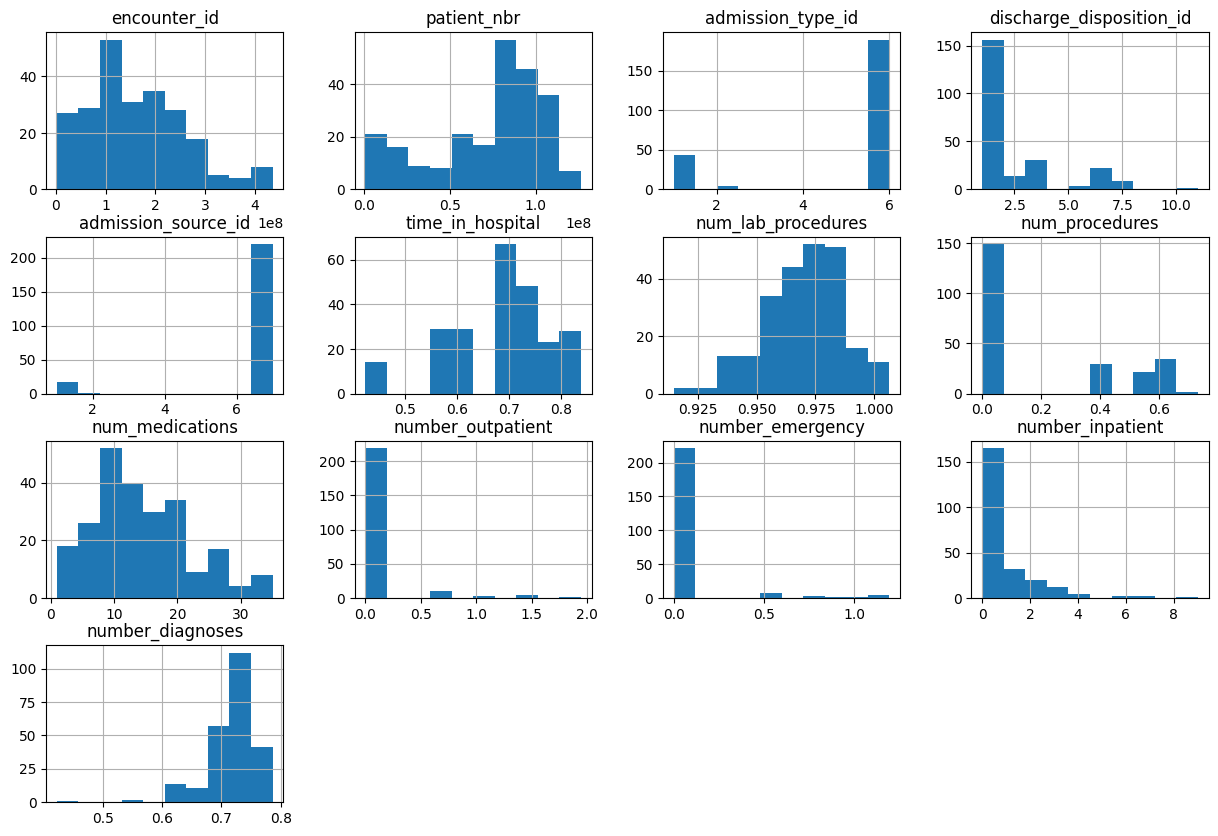

In [48]:
train_data.hist(figsize=(15, 10))

In [67]:
train_data.age.value_counts()

age
[50-60)    52
[60-70)    49
[70-80)    43
[40-50)    37
[80-90)    34
[30-40)    14
[20-30)     5
[10-20)     4
Name: count, dtype: int64

In [70]:
import pandas as pd

# 1) Make sure 'age' is present in train_data
if 'age' not in train_data.columns:
    # pull it from your original dataframe named `data`
    train_data = train_data.join(data['age'])

# 2) One-hot encode age and merge safely (handles index alignment)
age_dummies = pd.get_dummies(train_data['age'].astype('category'),
                             prefix='age', drop_first=True)

train_data = pd.concat(
    [
        train_data.drop(columns=['age'], errors='ignore').reset_index(drop=True),
        age_dummies.reset_index(drop=True)
    ],
    axis=1
)

train_data.head()


,encounter_id,patient_nbr,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,[60-70),[70-80),[80-90),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90)
0,6479016,20676798,Caucasian,Male,?,6,1,7,0.753653,?,...,False,False,True,False,False,False,False,False,False,True
1,181439346,107638839,Hispanic,Female,?,6,1,7,0.798928,?,...,True,False,False,False,False,False,False,True,False,False
2,163736112,106451928,AfricanAmerican,Female,?,6,1,7,0.672503,?,...,False,True,False,False,False,False,False,False,True,False
3,136549326,78119676,Hispanic,Female,?,6,2,7,0.732569,?,...,False,False,True,False,False,False,False,False,False,True
4,40182816,48102489,AfricanAmerican,Male,?,6,1,7,0.672503,?,...,False,False,False,False,False,True,False,False,False,False


<Axes: >

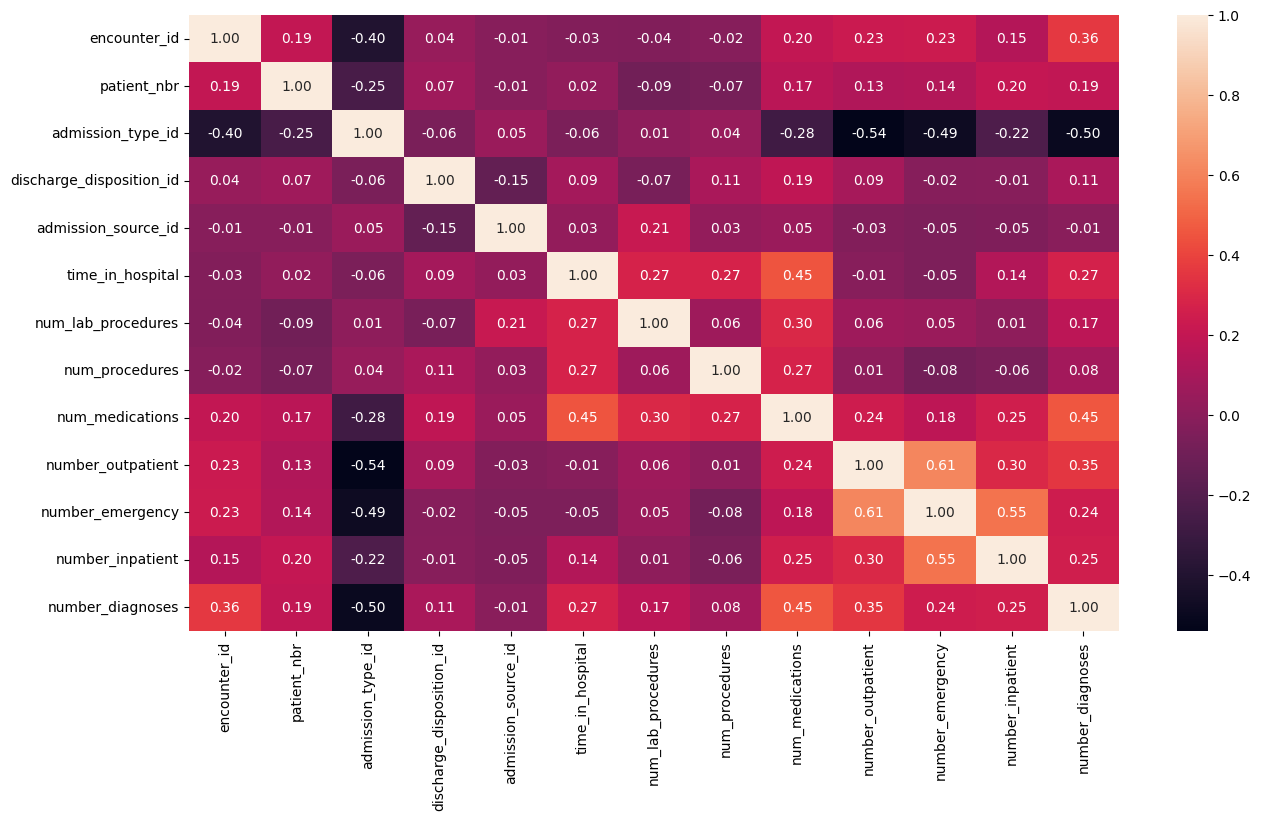

In [71]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, fmt=".2f")


<Axes: xlabel='num_lab_procedures', ylabel='time_in_hospital'>

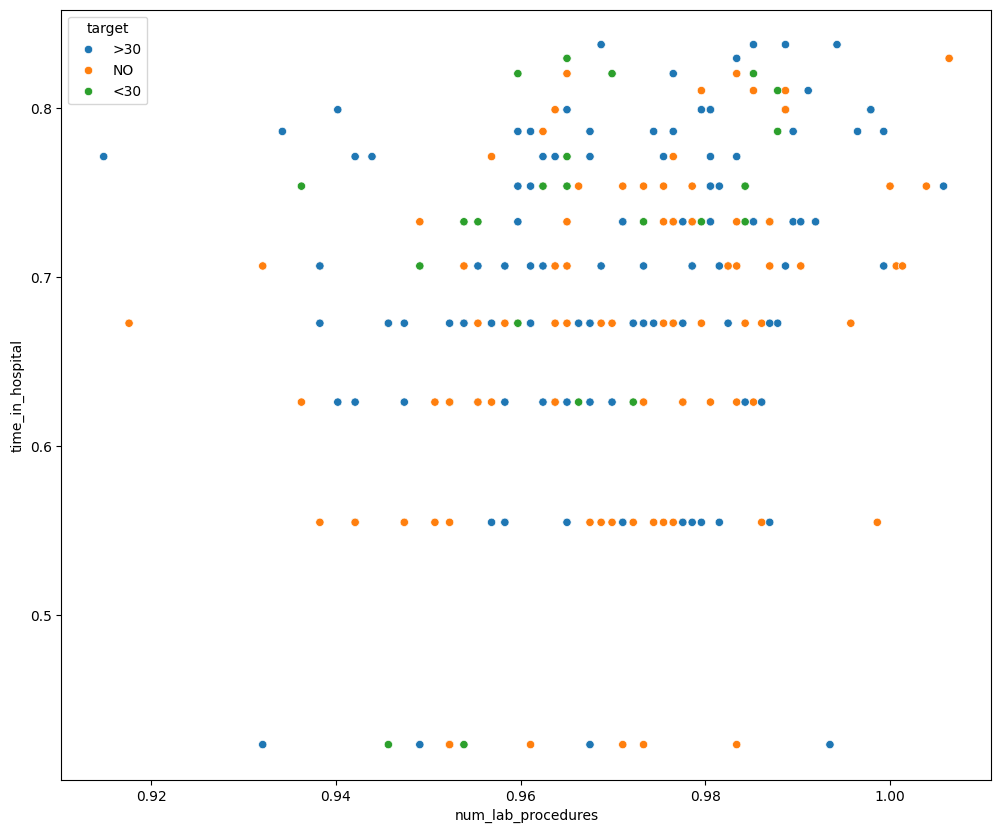

In [78]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=train_data, x='num_lab_procedures', y='time_in_hospital', hue='target')

In [80]:
data['total_visits'] = data['number_outpatient'] + data['number_inpatient'] + data['number_emergency']
data['avg_visits_per_stay'] = data['total_visits'] / (data['time_in_hospital'] + 1)
data['medications_per_day'] = data['num_medications'] / (data['time_in_hospital'] + 1)
data['labs_per_day'] = data['num_lab_procedures'] / (data['time_in_hospital'] + 1)
data['emergency_admission'] = data['admission_type_id'].apply(lambda x: 1 if x in [1,2] else 0)
data['complexity_level'] = pd.cut(data['number_diagnoses'],
                                  bins=[0,5,10,15,20],
                                  labels=['Low','Moderate','High','Extreme'])


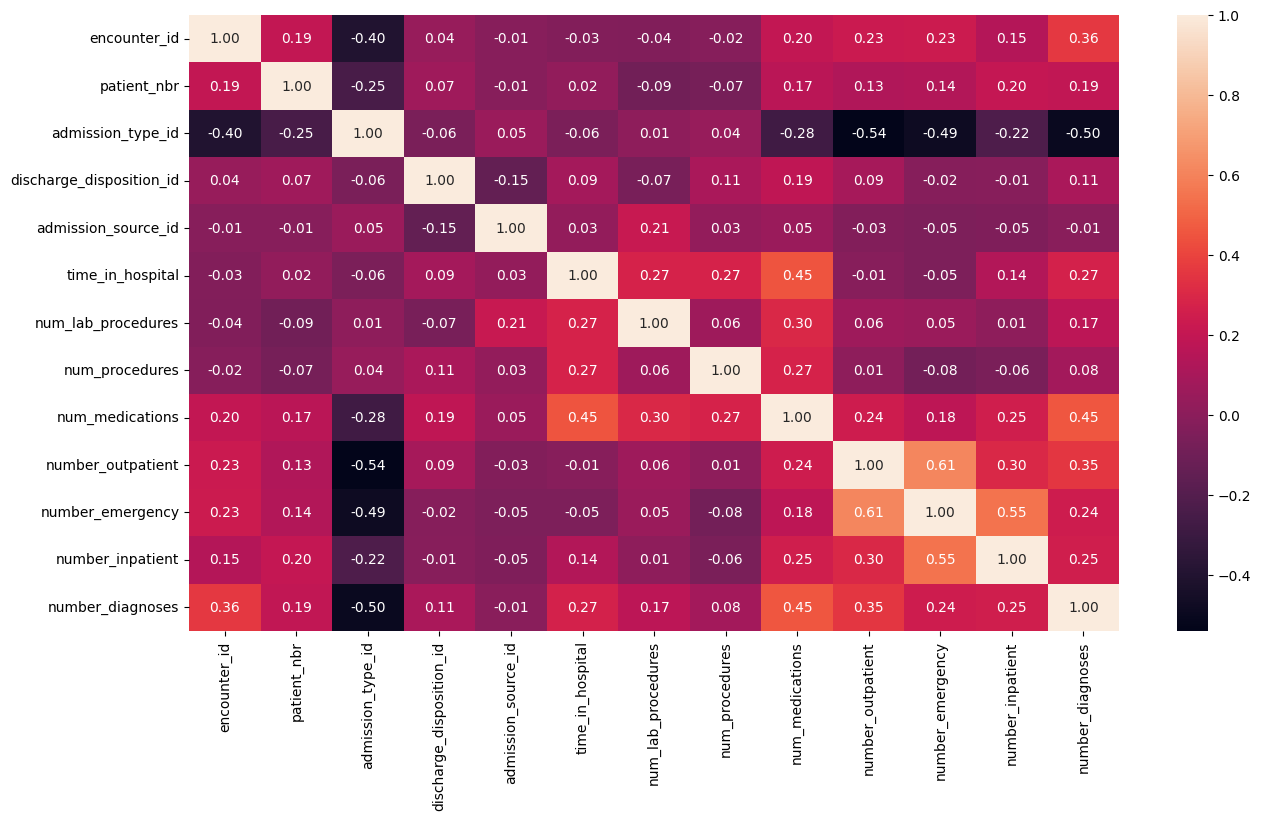

In [81]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, fmt=".2f")
plt.show()

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# --- 1) Build a clean binary target from either 'target' or 'readmitted' ---
if 'target' in train_data.columns:
    # if it's strings like '<30','NO','>30', map to binary
    if train_data['target'].dtype == 'O':
        y = (train_data['target'].astype(str) == '<30').astype(int)
    else:
        y = train_data['target'].astype(int)
elif 'readmitted' in train_data.columns:
    y = (train_data['readmitted'].astype(str) == '<30').astype(int)
else:
    raise ValueError("No target found: need a 'target' or 'readmitted' column.")

# Optional: drop rows where y is NA (just in case)
mask = ~y.isna()
y = y[mask]
X = train_data.loc[mask].copy()

# --- 2) Keep only numeric features (drop target/IDs if present) ---
for col in ['target', 'readmitted', 'encounter_id', 'patient_nbr']:
    if col in X.columns:
        X = X.drop(columns=[col])

# Replace inf with NaN so the imputer can handle it
X = X.replace([np.inf, -np.inf], np.nan)

# Select only numeric columns
X = X.select_dtypes(include=[np.number])

# --- 3) Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 4) Pipeline: impute -> scale -> logistic regression ---
clf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs'))
])

# --- 5) Fit & evaluate ---
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Target distribution (train):", np.bincount(y_train))
print(classification_report(y_test, y_pred))


Target distribution (train): [168  22]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        42
           1       0.20      0.67      0.31         6

    accuracy                           0.62        48
   macro avg       0.56      0.64      0.53        48
weighted avg       0.84      0.62      0.69        48



In [89]:
from sklearn.metrics import precision_recall_curve

prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1 = 2*prec*rec/(prec+rec+1e-9)
t_star = thr[f1.argmax()]
y_pred_opt = (y_proba >= t_star).astype(int)

print(f"Best-F1 threshold: {t_star:.3f}")
print(classification_report(y_test, y_pred_opt))


Best-F1 threshold: 0.822
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.38      0.43      0.40         7

    accuracy                           0.85        60
   macro avg       0.65      0.67      0.66        60
weighted avg       0.86      0.85      0.85        60



In [91]:
# === END-TO-END: from raw `data` to metrics (single cell) ===
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)

# 1) Target (binary: <30 -> 1, else -> 0)
y = (data['readmitted'].astype(str) == '<30').astype(int)

# 2) Pick features (adjust if some columns don’t exist in your data)
num_cols = [
    'time_in_hospital','num_medications','num_lab_procedures',
    'num_procedures','number_outpatient','number_emergency',
    'number_inpatient','number_diagnoses'
]
cat_cols = [
    'age','admission_type_id','discharge_disposition_id',
    'admission_source_id','gender','race','change','diabetesMed'
]

# keep only columns that actually exist to avoid KeyError
num_cols = [c for c in num_cols if c in data.columns]
cat_cols = [c for c in cat_cols if c in data.columns]

X = data[num_cols + cat_cols].copy()
X = X.replace('?', np.nan)

# 3) Preprocess
numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

pre = ColumnTransformer(
    transformers=[
        ('num', numeric, num_cols),
        ('cat', categorical, cat_cols)
    ]
)

# 4) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Model (balanced, higher iters; liblinear converges well on one-hot data)
clf = Pipeline(steps=[
    ('pre', pre),
    ('lr', LogisticRegression(max_iter=5000, class_weight='balanced', solver='liblinear'))
])

clf.fit(X_train, y_train)

# 6) Probabilities + default-threshold predictions
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred_035 = (y_proba >= 0.35).astype(int)

print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"PR-AUC : {average_precision_score(y_test, y_proba):.3f}")
print("\nReport @ threshold=0.35")
print(classification_report(y_test, y_pred_035))

# 7) Find best-F1 threshold and evaluate
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
t_star = thr[f1.argmax()]
y_pred_opt = (y_proba >= t_star).astype(int)

print(f"\nBest-F1 threshold: {t_star:.3f}")
print(classification_report(y_test, y_pred_opt))

# (optional) Confusion matrix at best-F1 threshold
cm = confusion_matrix(y_test, y_pred_opt)
print("Confusion matrix @ best-F1:\n", cm)


ROC-AUC: 0.620
PR-AUC : 0.364

Report @ threshold=0.35
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        53
           1       0.18      0.71      0.29         7

    accuracy                           0.58        60
   macro avg       0.56      0.64      0.50        60
weighted avg       0.85      0.58      0.66        60


Best-F1 threshold: 0.913
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.43      0.43      0.43         7

    accuracy                           0.87        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.87      0.87      0.87        60

Confusion matrix @ best-F1:
 [[49  4]
 [ 4  3]]


In [92]:
# === Random Forest upgrade: end-to-end training + evaluation + feature importances ===
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix
)

# 1) Target
y = (data['readmitted'].astype(str) == '<30').astype(int)

# 2) Feature set (practical mix of strong numerics + useful cats)
num_cols = [
    'time_in_hospital','num_medications','num_lab_procedures',
    'num_procedures','number_outpatient','number_emergency',
    'number_inpatient','number_diagnoses'
]
cat_cols = [
    'age','admission_type_id','discharge_disposition_id',
    'admission_source_id','gender','race','change','diabetesMed'
]

# Keep only columns that exist
num_cols = [c for c in num_cols if c in data.columns]
cat_cols = [c for c in cat_cols if c in data.columns]

X = data[num_cols + cat_cols].copy().replace('?', np.nan)

# 3) Preprocess
numeric = Pipeline([('imputer', SimpleImputer(strategy='median'))])
categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
pre = ColumnTransformer([
    ('num', numeric, num_cols),
    ('cat', categorical, cat_cols)
])

# 4) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Model (class_weight helps imbalance)
rf = Pipeline([
    ('pre', pre),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    ))
])

rf.fit(X_train, y_train)

# 6) Evaluate
y_proba = rf.predict_proba(X_test)[:, 1]

print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"PR-AUC : {average_precision_score(y_test, y_proba):.3f}")

# default-ish threshold tuned for recall
y_pred_035 = (y_proba >= 0.35).astype(int)
print("\nReport @ threshold=0.35")
print(classification_report(y_test, y_pred_035))

# Best-F1 threshold
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1 = 2*prec*rec/(prec+rec+1e-9)
t_star = thr[f1.argmax()]
y_pred_opt = (y_proba >= t_star).astype(int)

print(f"\nBest-F1 threshold: {t_star:.3f}")
print(classification_report(y_test, y_pred_opt))
print("Confusion matrix @ best-F1:\n", confusion_matrix(y_test, y_pred_opt))

# 7) Top feature importances (map back to column names)
def get_feature_names(preprocessor, num_cols, cat_cols):
    names = []
    if num_cols:
        names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        ohe_names = ohe.get_feature_names_out(cat_cols).tolist()
        names.extend(ohe_names)
    return names

feat_names = get_feature_names(rf.named_steps['pre'], num_cols, cat_cols)
importances = rf.named_steps['rf'].feature_importances_

feat_df = pd.DataFrame({'feature': feat_names, 'importance': importances}) \
            .sort_values('importance', ascending=False) \
            .head(15)

print("\nTop 15 features by importance:")
print(feat_df.to_string(index=False))


ROC-AUC: 0.743
PR-AUC : 0.480

Report @ threshold=0.35
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.50      0.43      0.46         7

    accuracy                           0.88        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.88      0.88      0.88        60


Best-F1 threshold: 0.478
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.75      0.43      0.55         7

    accuracy                           0.92        60
   macro avg       0.84      0.70      0.75        60
weighted avg       0.91      0.92      0.91        60

Confusion matrix @ best-F1:
 [[52  1]
 [ 4  3]]

Top 15 features by importance:
                   feature  importance
           num_medications    0.116360
        num_lab_procedures    0.106930
          time_in_hospital    0.106749
discharge_disposition_id_3   

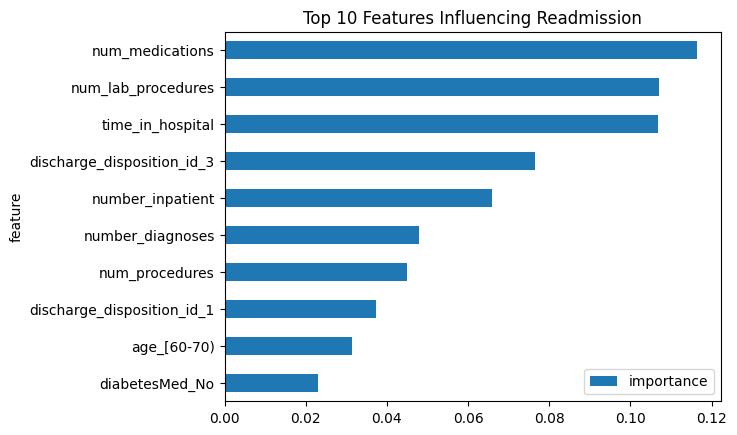

In [95]:
import matplotlib.pyplot as plt
feat_df.head(10).plot(kind='barh', x='feature', y='importance')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Readmission')
plt.show()


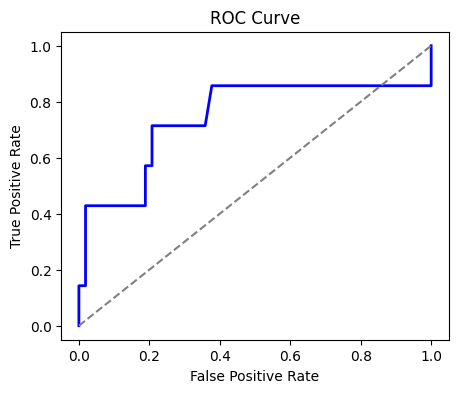

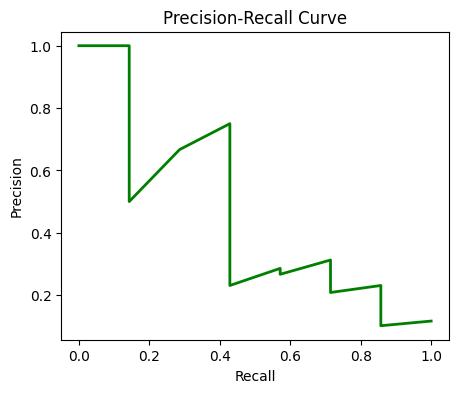

In [96]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(rec, prec, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [102]:
import joblib
import json

# save the full pipeline (preprocessor + random forest)
joblib.dump(rf, "readmission_rf_pipeline.joblib")

# save the decision threshold (use your best-F1 threshold)
with open("threshold.json", "w") as f:
    json.dump({"threshold": float(t_star)}, f)

print("Saved: readmission_rf_pipeline.joblib, threshold.json")


Saved: readmission_rf_pipeline.joblib, threshold.json
